# The Traveling Salesman Problem


## Genetic Algorithm

Il codice presenta una struttura a classi:
- classe virtuale *Metropoly*: come membro privato ha un vettore di pair che contiene le coordinate delle città generate randomicamente. Da questa classe ereditano due classi figlie, le quali implementano al loro interno la generazione delle città secondo i due criteri rischiesti e la funzione costo:
    1. classe *Circumference*;
    2. classe *Square*.
    
È stata utilizzata la const function:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
    
- classe *Individual*: rappresenta il singolo individuo della simulazione, ossia l'ordine delle città da visitare. Il percorso è stato rappresentato da un vector di int che indica le città nell'ordine in cui il venditore le visiterà:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

Fra i membri privati figura anche il valore della funzione costo $L^{(1)}$ relativa al percorso.

In questa classe vengono implementati i **genetic-mutation** operators, ne sono stati implementati quattro diversi tipi:
1. permutazione di coppie di città (e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$);
2. shift di $+n$ posizioni per $m$ città contigue (ad eccezione della prima città e $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ per un $+2$ shift della seconda e terza città;
3. permutazione di $m$ città contigue (ad eccezione della prima città) con altre differenti $m$ città contigue ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ per una permutazione della seconda  terza città con le ultime due;
4. inversione dell'ordine in cui appaiono nel percorso $m$ città (ad eccezione della prima e $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ per l'nversione delle città da 2 a 4.

Una mutazione ha una probabilità di presentarsi del $p_m = 10 \%$ nella creazione di un nuovo individuo. Se questa avviene, uno solo dei *genetic-mutation* operators viene scelto, tutti con uguale probabilità $p^{(i)}_m = 25 \%$.


- classe *Population*: rappresenta l'insieme di tutti gli individui. Tra i membri privati figurano due vector di *Individual* corrispondenti alla vecchia e nuova generazione (al termine della generazione di tutti gl individui la nuova sovrascrive la vecchia), l' *Individual* migliore della generazione corrente e le percentuali di mutazione e crossover.

In questa classe sono implementati i metodi:
   1. sort degli individui in base al fitness;
   2. **crossover** operator con una probabilità $p_c = 50 \%$;
   3. **selection** attraverso il seguente algoritmo: individuo $j = int(N \times r^p)$ dove $r$ è un random number $r\in[0,1)$ e $p = 2$;
   4. media della funzione costo per la migliore metà degli individui;
   5. creazione di nuova generazione di individui.

Di seguito vengono riportati i risultati ottenuti con una popolazione di $P = 10^4$ individui per $N = 100$ generazioni.

## Circumference


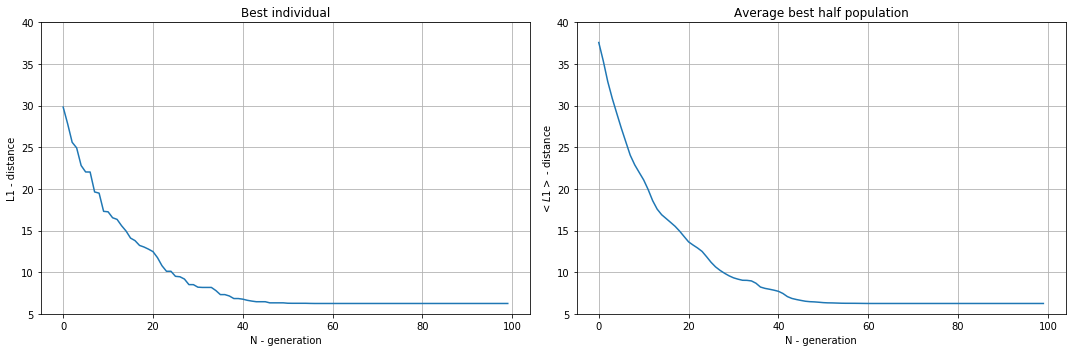

Best: 6.2403 	 Average: 6.2403


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

f = np.loadtxt("Data/cr_bestvalue.dat", usecols=(0), delimiter=' ', unpack='true')
x = [*range(len(f))]
ax.plot(x,f)

ax.set_title('Best individual')
ax.set_xlabel('N - generation')
ax.set_ylabel('L1 - distance')
ax.set_ylim(5,40)
ax.grid(True)

f2 = np.loadtxt("Data/cr_halfaverage.dat", usecols=(0), delimiter=' ', unpack='true')
x = [*range(len(f2))]
ax2.plot(x,f2)

ax2.set_title('Average best half population')
ax2.set_xlabel('N - generation')
ax2.set_ylabel('$<L1>$ - distance')
ax2.set_ylim(5,40)
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f'Best: {float(f[-1:])} \t Average: {float(f2[-1:])}')

Dopo circa $N = 45$ generazioni il miglior inividuo dell'algoritmo genetico ha raggiunto la convergenza in un minimo locale della funzione $L^{(1)}$. Intorno alla generazione $N = 50$ anche metà della popolazione ha raggiunto lo stesso minimo.
Dal disegno del miglior percorso raffigurato qui sotto, possiamo affermare che il minimo sia un minimo assoluto per $L^{(1)}$, in quanto esso rappresenta il percorso ottimale che è noto.

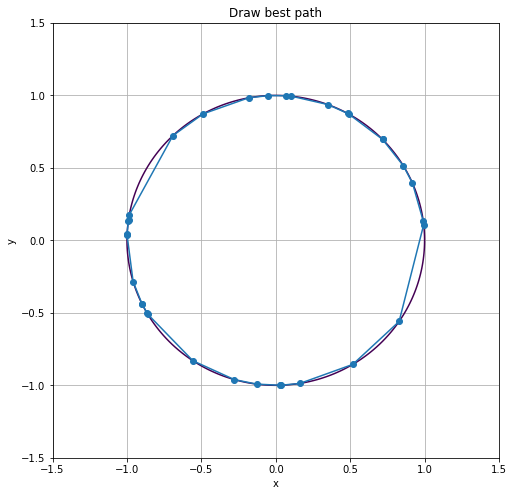

In [17]:
from math import cos, sin

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)


x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 1
ax.contour(X,Y,F,[0])

_x = []
_y = []
rho,theta = np.loadtxt("Data/cr_bestpath.dat", usecols=(0,1), delimiter=' ', unpack='true')
for i in range(len(rho)):
    _x.append(rho[i] * cos(theta[i]))
    _y.append(rho[i] * sin(theta[i]))

ax.plot(_x,_y,'o-')
ax.plot()

ax.set_title('Draw best path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim((-1.5,1.5))
ax.set_ylim((-1.5,1.5))
ax.grid(True)
plt.show()

## Square


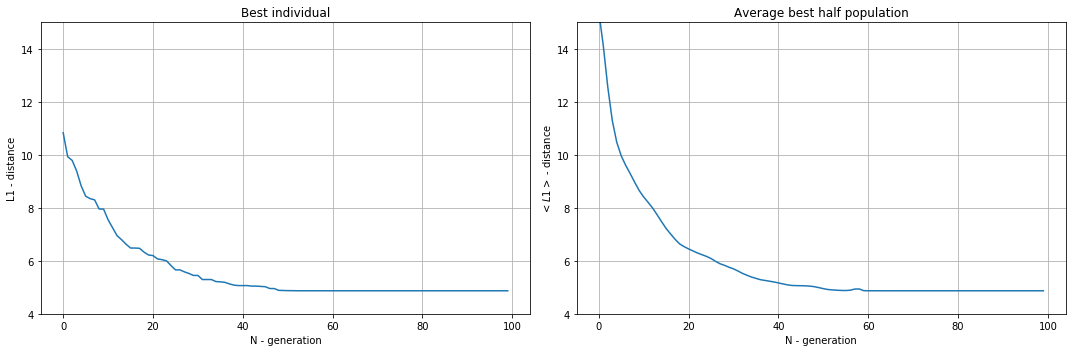

Best: 4.86889 	 Average: 4.86889


In [2]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

f = np.loadtxt("Data/sq_bestvalue.dat", usecols=(0), delimiter=' ', unpack='true')
x = [*range(len(f))]
ax.plot(x,f)

ax.set_title('Best individual')
ax.set_xlabel('N - generation')
ax.set_ylabel('L1 - distance')
ax.set_ylim(4,15)
ax.grid(True)

f2 = np.loadtxt("Data/sq_halfaverage.dat", usecols=(0), delimiter=' ', unpack='true')
x = [*range(len(f2))]
ax2.plot(x,f2)

ax2.set_title('Average best half population')
ax2.set_xlabel('N - generation')
ax2.set_ylabel('$<L1>$ - distance')
ax2.set_ylim(4,15)
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f'Best: {float(f[-1:])} \t Average: {float(f2[-1:])}')

Dopo circa $N = 50$ generazioni il miglior inividuo dell'algoritmo genetico ha raggiunto la convergenza in un minimo locale di $L^{(1)}$. Intorno alla generazione $N = 60$ anche metà della popolazione ha raggiunto lo stesso minimo.
Qui sotto viene raffigurato il disegno del migliore percorso ottenuto, ma non possiamo affermare che esso corrisponda al minimo assoluto di $L^{(1)}$ in quanto la soluzione non è nota.

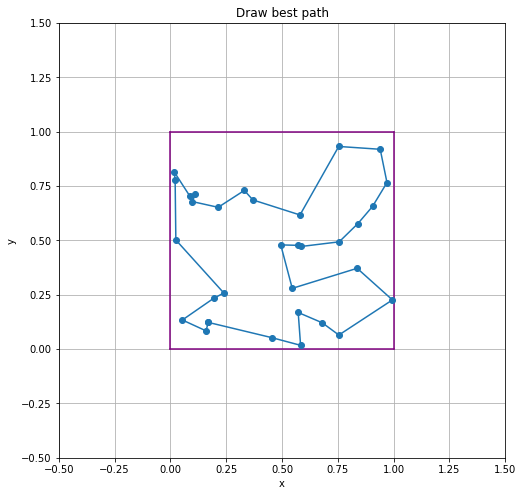

In [21]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)


ax.plot([0,1],[1,1], color='purple')
ax.plot([0,1],[0,0], color='purple')
ax.plot([0,0],[0,1], color='purple')
ax.plot([1,1],[0,1], color='purple')

x,y = np.loadtxt("Data/sq_bestpath.dat", usecols=(0,1), delimiter=' ', unpack='true')

ax.plot(x,y,'o-')
ax.plot()

ax.set_title('Draw best path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim((-0.5,1.5))
ax.set_ylim((-0.5,1.5))
ax.grid(True)
plt.show()